## Introductory Overview

One of the metrics we chose to analyze is the data surrounding inspections and violations found in restaurants and food facilities throughout the neighborhoods of Pittsburgh. Considering just how essential eating is to life, this metric is incredibly important in considering which neighborhood is best. It gives us a great depiction of the sanitary practices and the skill and efficiency of residents and workers alike within each neighborhood.

* NOTE: Make sure to upload the files 'Restaurant_Inspections_Data.csv', 'municipal_neighborhood_mapping.csv', 'Restaurant_Inspections_Vio_Data.csv', and 'zipcode_neighborhood_mapping_no_duplicates.csv' to the same directory as this notebook prior to running. Furthermore, the errors stating that values are trying to be set on a copy of a slice from a DataFrame do not interfere with the final results.

In [1]:
#Read data
import pandas as pd
df = pd.read_csv('Restaurant_Inspections_Data.csv')
mapping = pd.read_csv('municipal_neighborhood_mapping.csv')

In [2]:
#a peak of the data
df

,_id,encounter,id,placard_st,placard_desc,facility_name,bus_st_date,category_cd,description,num,...,inspect_dt,start_time,end_time,municipal,ispt_purpose,abrv,purpose,reispt_cd,reispt_dt,status
0,33956860,201506260037,118,1,Inspected & Permitted,Tom Friday's Market,1984-06-17,113,Retail/Convenience Store,3639,...,2015-06-26,10:45:00,13:00:00,Pittsburgh-127,1,Ini,Initial,1,2015-07-10,7
1,33956861,201611100029,118,1,Inspected & Permitted,Tom Friday's Market,1984-06-17,113,Retail/Convenience Store,3639,...,2016-11-10,13:00:00,14:30:00,Pittsburgh-127,1,Ini,Initial,2,NaN,7
2,33956862,201601260032,118,1,Inspected & Permitted,Tom Friday's Market,1984-06-17,113,Retail/Convenience Store,3639,...,2016-01-26,12:40:00,13:20:00,Pittsburgh-127,2,Reispt,Reinspection,2,NaN,7
3,33956863,201411190029,118,1,Inspected & Permitted,Tom Friday's Market,1984-06-17,113,Retail/Convenience Store,3639,...,2014-11-19,13:40:00,15:25:00,Pittsburgh-127,1,Ini,Initial,1,2014-12-01,7
4,33956864,201507100022,118,1,Inspected & Permitted,Tom Friday's Market,1984-06-17,113,Retail/Convenience Store,3639,...,2015-07-10,15:40:00,16:30:00,Pittsburgh-127,2,Reispt,Reinspection,2,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112421,34069281,202403200014,202403200005,1,Inspected & Permitted,Grogan Beverage,2024-03-20,113,Retail/Convenience Store,840,...,2024-03-20,13:00:00,13:35:00,Coraopolis,4,New Fac,New Facility,2,NaN,1
112422,34069282,202403270013,202403200008,1,Inspected & Permitted,Raising Cane's Chicken Fingers #1049,2024-03-27,212,Chain Restaurant without Liquor,410,...,2024-03-27,13:00:00,13:30:00,Pleasant Hills,4,New Fac,New Facility,2,NaN,1
112423,34069283,202403200022,202403200008,1,Inspected & Permitted,Raising Cane's Chicken Fingers #1049,2024-03-27,212,Chain Restaurant without Liquor,410,...,2024-03-20,14:00:00,15:30:00,Pleasant Hills,50,Cnslt,Consultation,2,NaN,1
112424,34069284,202403220012,202403220001,1,Inspected & Permitted,All American Field House / Cadence Fuel + Gear,2024-03-22,115,Packaged Food Only,1,...,2024-03-22,14:30:00,15:00:00,Monroeville,4,New Fac,New Facility,2,NaN,1


Top 15 municipalities by inspection counts:
East Allegheny               10874
Larimer                       9642
Lincoln-Lemington-Belmar      6456
Bedford Dwellings             6101
Northview Heights             5934
Central Business District     5716
Summer Hill                   5643
North Shore                   5103
Mt. Oliver Boro               3955
Middle Hill                   3443
Spring Hill-City View         3389
Banksville                    3253
Perry South                   3051
Outside City                  2946
Garfield                      2851
Name: NEIGHBORHOOD, dtype: int64


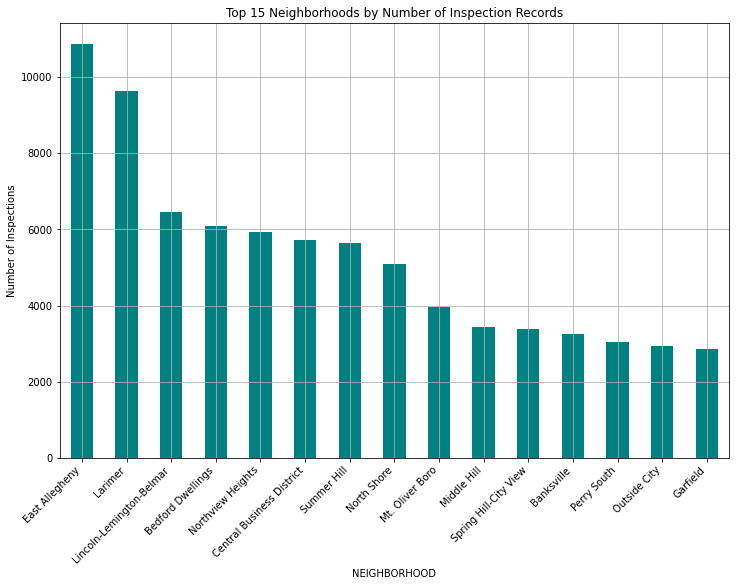

In [3]:
import matplotlib.pyplot as plt

# Clean up the 'municipal' column
df['municipal'] = df['municipal'].str.strip().str.title()

mun_to_neighborhood = dict(zip(mapping['municipal'], mapping['NEIGHBORHOOD']))
df['NEIGHBORHOOD'] = df['municipal'].map(mun_to_neighborhood)
# Remove entries that did not get any neighborhood assigned (i.e., incident_zip was not in mapping)
df = df.dropna(subset=['NEIGHBORHOOD'])

# Count the number of records for each municipality and get the top 15
inspection_counts_raw = df['NEIGHBORHOOD'].value_counts()
inspection_counts = df['NEIGHBORHOOD'].value_counts().head(15)
# # Print the sorted counts to see the ranking of top 15
print("Top 15 municipalities by inspection counts:")
print(inspection_counts)

# # Plotting the results for top 15
plt.figure(figsize=(12, 8))
inspection_counts.plot(kind='bar', color='teal')
plt.title('Top 15 Neighborhoods by Number of Inspection Records')
plt.xlabel('NEIGHBORHOOD')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45, ha='right')  # Improve label visibility
plt.grid(True)
plt.show()

<ipython-input-4-ff01fa92bfd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspect_dt'] = pd.to_datetime(df['inspect_dt'], errors='coerce')
<ipython-input-4-ff01fa92bfd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bus_st_date'] = pd.to_datetime(df['bus_st_date'], errors='coerce')
<ipython-input-4-ff01fa92bfd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Top 15 NEIGHBORHOOD by new facility inspections since 2021:
East Allegheny               306
Larimer                      220
Bedford Dwellings            150
Central Business District    138
Summer Hill                  126
Lincoln-Lemington-Belmar     121
Northview Heights            109
Garfield                      97
Beechview                     91
Mt. Oliver Boro               89
North Shore                   84
Spring Hill-City View         74
Perry South                   65
Banksville                    65
Upper Lawrenceville           60
Name: NEIGHBORHOOD, dtype: int64


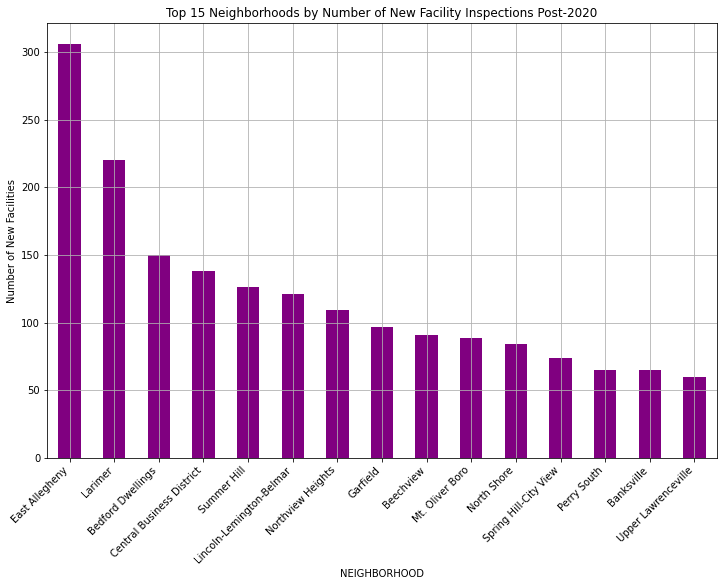

In [4]:
# Ensure date fields are recognized as dates and clean the 'municipal' field
df['inspect_dt'] = pd.to_datetime(df['inspect_dt'], errors='coerce')
df['bus_st_date'] = pd.to_datetime(df['bus_st_date'], errors='coerce')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].str.strip().str.title()

# Filter data for new facilities inspected after 2020
new_facilities = df[(df['purpose'].str.contains("New Facility", case=False, na=False)) & (df['inspect_dt'].dt.year > 2020)]

# Count the number of new facilities per municipality
new_facility_counts_raw = new_facilities['NEIGHBORHOOD'].value_counts()
new_facility_counts = new_facilities['NEIGHBORHOOD'].value_counts().head(15)

# Print the sorted counts to see the ranking of top 15
print("Top 15 NEIGHBORHOOD by new facility inspections since 2021:")
print(new_facility_counts)

# Plotting the results for top 15
plt.figure(figsize=(12, 8))
new_facility_counts.plot(kind='bar', color='purple')
plt.title('Top 15 Neighborhoods by Number of New Facility Inspections Post-2020')
plt.xlabel('NEIGHBORHOOD')
plt.ylabel('Number of New Facilities')
plt.xticks(rotation=45, ha='right')  # Improve label visibility
plt.grid(True)
plt.show()

In [6]:
# Load the 2nd dataset
df = pd.read_csv('Restaurant_Inspections_Vio_Data.csv')
zipcode_mapping = pd.read_csv('zipcode_neighborhood_mapping_no_duplicates.csv')
zipcode_mapping['ZipCode'] = zipcode_mapping['ZipCode'].apply(lambda x: str(int(x)) if pd.notnull(x) else None)
df['zip'] = df['zip'].apply(lambda x: str(int(float(x))) if pd.notnull(x) and x != 'nan' else None)
df['zip'] = df['zip'].astype(str)
df = df[df['zip'].str.startswith('15') &
        (df['zip'].str.len() == 5) &
        (df['zip'].str.isdigit())]
zip_to_neighborhood = dict(zip(zipcode_mapping['ZipCode'], zipcode_mapping['INCIDENTNEIGHBORHOOD']))

# Map 'incident_zip' to the new neighborhood data
df['NEIGHBORHOOD'] = df['zip'].map(zip_to_neighborhood)

# Remove entries that did not get any neighborhood assigned (i.e., incident_zip was not in mapping)
df = df.dropna(subset=['NEIGHBORHOOD'])
df

,_id,encounter,id,placard_st,facility_name,bus_st_date,description,description_new,num,street,...,inspect_dt,start_time,end_time,municipal,rating,low,medium,high,url,NEIGHBORHOOD
0,107158314,201408280014,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,"Fabrication, Design, Installation and Maintenance",5414,Walnut St,...,2014-08-25,09:30:00,10:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...,Larimer
1,107158315,201408280014,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Administrative,5414,Walnut St,...,2014-08-25,09:30:00,10:45:00,Pittsburgh-107,V,NaN,NaN,NaN,http://appsrv.alleghenycounty.us/reports/rwser...,Larimer
2,107158316,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Hot Holding Temperatures,5414,Walnut St,...,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,F,F,T,http://appsrv.alleghenycounty.us/reports/rwser...,Larimer
3,107158317,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Facilities to Maintain Temperature,5414,Walnut St,...,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...,Larimer
4,107158318,201510130064,59,1,Shadyside Market,1984-06-17,Retail/Convenience Store,Cleaning and Sanitization,5414,Walnut St,...,2015-10-13,13:40:00,15:45:00,Pittsburgh-107,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...,Larimer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349095,107507409,202403270018,202403270005,1,The Journeyman's Table,2024-03-27,Restaurant with Liquor,Ventilation,3523,Penn Avenue,...,2024-03-27,14:00:00,15:30:00,Pittsburgh-106,V,T,NaN,NaN,http://appsrv.alleghenycounty.us/reports/rwser...,Central Oakland
349096,107507410,202403270018,202403270005,1,The Journeyman's Table,2024-03-27,Restaurant with Liquor,Cleaning and Sanitization,3523,Penn Avenue,...,2024-03-27,14:00:00,15:30:00,Pittsburgh-106,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...,Central Oakland
349097,107507411,202403270018,202403270005,1,The Journeyman's Table,2024-03-27,Restaurant with Liquor,Plumbing,3523,Penn Avenue,...,2024-03-27,14:00:00,15:30:00,Pittsburgh-106,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...,Central Oakland
349098,107507412,202403270018,202403270005,1,The Journeyman's Table,2024-03-27,Restaurant with Liquor,"Fabrication, Design, Installation and Maintenance",3523,Penn Avenue,...,2024-03-27,14:00:00,15:30:00,Pittsburgh-106,V,T,F,F,http://appsrv.alleghenycounty.us/reports/rwser...,Central Oakland


Top 15 neighborhoods with the fewest violations:
NEIGHBORHOOD
Golden Triangle/Civic Arena     400
Banksville                      596
Elliott                        1043
Hazelwood                      1514
Marshall-Shadeland             1730
Brighton Heights               2557
Bloomfield                     2809
Garfield                       3266
Middle Hill                    3328
Point Breeze                   3395
Sheraden                       3556
Summer Hill                    3659
Central Oakland                6107
Bon Air                        6706
Perry South                    6985
Name: count, dtype: int64


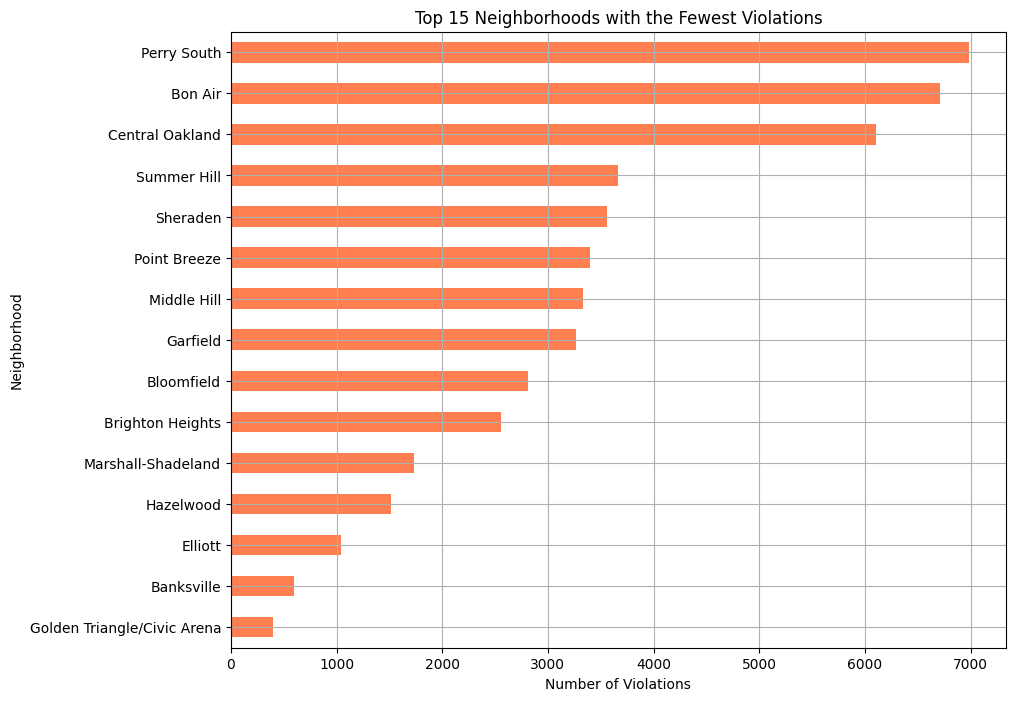

In [40]:
violation_counts_neighborhood = df['NEIGHBORHOOD'].value_counts(ascending=True)

# Select the top 15 neighborhoods with the fewest violations
top_15_neighborhoods_fewest_violations = violation_counts_neighborhood.head(15)

# Print the results
print("Top 15 neighborhoods with the fewest violations:")
print(top_15_neighborhoods_fewest_violations)

# Plotting the results
plt.figure(figsize=(10, 8))
top_15_neighborhoods_fewest_violations.plot(kind='barh', color='coral')
plt.title('Top 15 Neighborhoods with the Fewest Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Neighborhood')
plt.grid(True)
plt.show()

Top 15 NEIGHBORHOOD with the highest percentage of high ratings:
North Shore              12.777434
Larimer                  12.700780
Stanton Heights          12.649957
Point Breeze             12.312224
Bon Air                  11.392783
Upper Lawrenceville      11.370467
Outside City             11.352028
Perry South              11.309950
Mt. Oliver Boro          11.212568
Northview Heights        10.643519
Hazelwood                10.237781
Upper Hill               10.097045
Central Oakland          10.070411
Bedford Dwellings        10.040891
Spring Hill-City View     9.614288
Name: NEIGHBORHOOD, dtype: float64


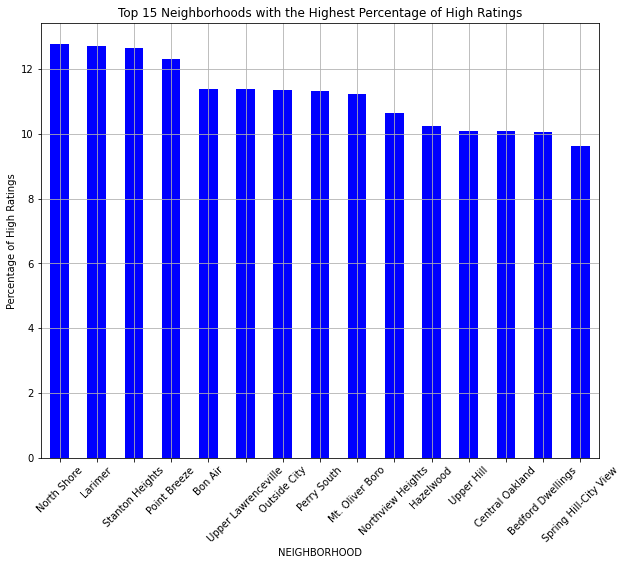

In [7]:
# Total inspections per NEIGHBORHOOD
total_inspections = df['NEIGHBORHOOD'].value_counts()

# High ratings per NEIGHBORHOOD
high_ratings = df[df['high'] == 'T']['NEIGHBORHOOD'].value_counts()

# Calculate the percentage of high ratings
percentage_high_raw = (high_ratings / total_inspections * 100).dropna()

# Sort and select the top 15 municipalities with the highest percentage of high ratings
top_15_high_percentage = percentage_high_raw.sort_values(ascending=False).head(15)

# Print the results
print("Top 15 NEIGHBORHOOD with the highest percentage of high ratings:")
print(top_15_high_percentage)

# Plotting the results
plt.figure(figsize=(10, 8))
top_15_high_percentage.plot(kind='bar', color='blue')
plt.title('Top 15 Neighborhoods with the Highest Percentage of High Ratings')
plt.xlabel('NEIGHBORHOOD')
plt.ylabel('Percentage of High Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [42]:
violation_counts = df['facility_name'].value_counts()

# Find the facility with the most violations
most_violations = violation_counts.idxmax()
most_violations_count = violation_counts.max()

# Print the result
print(f"The facility with the most violations is '{most_violations}' with {most_violations_count} violations.")

The facility with the most violations is 'Subway Sandwiches & Salads' with 938 violations.


In [43]:
df1 = top_15_high_percentage
df2 = top_15_neighborhoods_fewest_violations
df3 = new_facility_counts

In [75]:
df1 = df1.reset_index().rename(columns={0: 'value'})
df1['rank1'] = df1.index + 1
df1.set_index('NEIGHBORHOOD', inplace=True)

df2 = df2.reset_index().rename(columns={0: 'value'})
df2['rank2'] = df2.index + 1
df2.set_index('NEIGHBORHOOD', inplace=True)

df3 = df3.reset_index().rename(columns={0: 'value'})
df3['rank3'] = df3.index + 1
df3.set_index('NEIGHBORHOOD', inplace=True)

merged_df = df1.merge(df2, left_index=True, right_index=True, how='outer').merge(df3, left_index=True, right_index=True, how='outer')
merged_df['rank1'].fillna(20, inplace=True)
merged_df['rank2'].fillna(20, inplace=True)
merged_df['rank3'].fillna(20, inplace=True)

merged_df['total_rank'] = merged_df[['rank1', 'rank2', 'rank3']].sum(axis=1)
merged_df.sort_values('total_rank', ascending=True, inplace=True)

top_15 = merged_df.head(15)

                             total_rank
NEIGHBORHOOD                           
Larimer                            24.0
North Shore                        32.0
Point Breeze                       34.0
Hazelwood                          35.0
Banksville                         36.0
Perry South                        36.0
Garfield                           36.0
Bedford Dwellings                  37.0
Summer Hill                        37.0
Northview Heights                  37.0
Bon Air                            39.0
Mt. Oliver Boro                    39.0
Upper Lawrenceville                41.0
East Allegheny                     41.0
Golden Triangle/Civic Arena        41.0


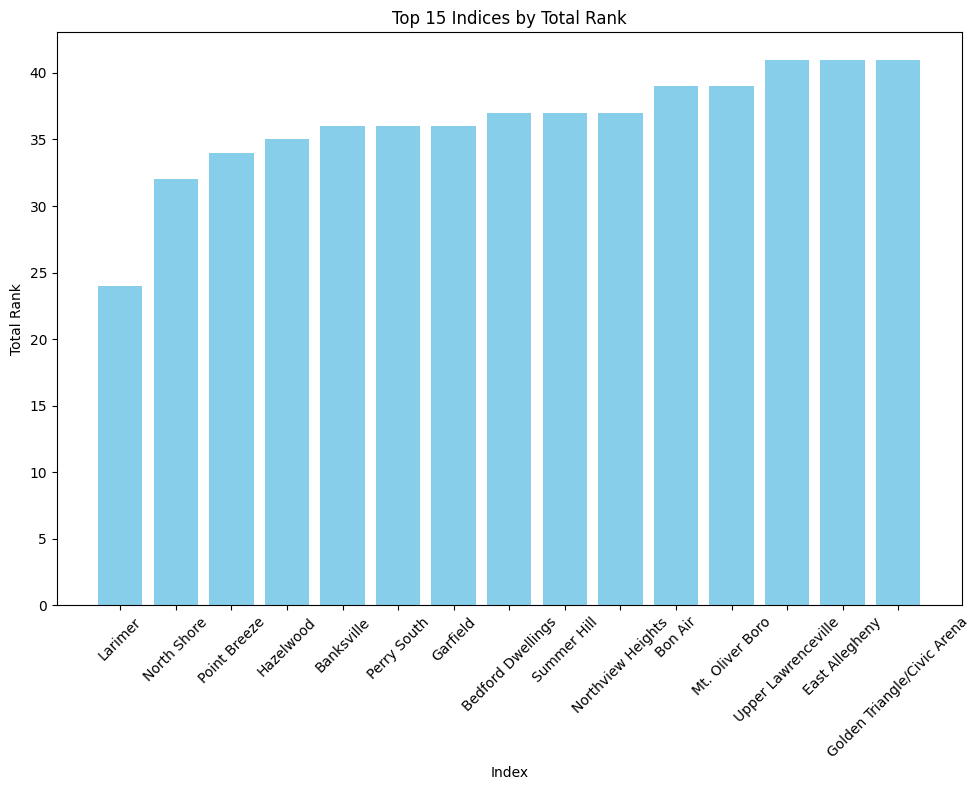

In [78]:
plt.figure(figsize=(10, 8))
plt.bar(top_15.index, top_15['total_rank'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Total Rank')
plt.title('Top 15 Indices by Total Rank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Results and Conclusion

To reach our conclusion, we averaged the placements of each neighborhood within the various sub-metrics displayed. For example, if Squirrel Hill had placed 1st in one metric, 2nd in another, 3rd in another, and 4th in the last, its final score would have been 2.5. This allowed us to consider all facets of this study. In the end, the neighborhood with the best average score was Larimer with a score of 24, significantly ahead of any other neighborhood.

While Larimer did not place amongst the top 15 neighborhoods in terms of least violations, it came in 2nd place in each of the other metrics examined within this study. The neighborhood in 2nd place overall, North Shore, performed similarly, missing the top 15 neighborhoods in terms of least violations but placing amongst the top 15 in every other metric. While this may seem as though it invalidates the claim that these neighborhoods are the best in this study, it is important to note that the start of this study dates back much farther than the other two we considered in this project. The fact that these neighborhoods are some of the most frequently inspected in modern times and that they have consistently indicate that their high numbers of violations came early in the study. Thus, based on this data, we can conclude that Larimer is the best neighborhood in Pittsburgh within the context of inspections of food facilities.